# <center>Avoiding Shark Attacks: Most dangerous and deadly months </center>
#### <center>The presented project aims to demonstrate the necessary skills to manipulate and to extract insights from a messy dataframe. To demonstrate that, lets define some questions to be answered by this dataset:</center>
# <center>1) Which month is responsible for the mayor cases of shark attacks? And about the fatal ones?</center>


## Importing, cleaning and first impressions

###### First of all, lets import the file, and the features that we need to analise all global sharks attacks recorded until 2016:

In [143]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

#open file and decoding
shark_attacks = pd.read_csv('/Users/joaos/Desktop/GSAF5.csv', sep=',', encoding='ansi')

%matplotlib inline

plt.rcParams['figure.figsize'] = (12,6)

###### Backing up the dataframe:

In [144]:
shark_attacks_bkp = shark_attacks

###### First view from data:

In [145]:
shark_attacks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


##### Then the shape of dataframe:

In [146]:
shark_attacks.shape

(5992, 24)

###### Listing all the columns in the file:

In [147]:
shark_attacks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

###### Giving a look at the columns names we can see that <font color=red>Sex</font> , <font color=red>Fatal</font> and <font color=red>Species</font> have spaces or special characters in their names. Let's standardize them:

In [148]:
columns_name = list(shark_attacks.columns)
columns_name[9] = 'Sex'
columns_name[12] = 'Fatal'
columns_name[14] = 'Species'
shark_attacks.columns = columns_name

Listing null and unecessary data

In [149]:
# In order to save space and memory, lets clean our data table. First of all, we need to count the missing values per columns
null_cols = shark_attacks.isnull().sum()
print(null_cols)

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal                       19
Time                      3213
Species                   2934
Investigator or Source      15
pdf                          0
href formula                 1
href                         3
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64


In [150]:
#As we can see in null_cols, columns Unnamed: 22 and Unnamed: 23 are composed for just missing numbers. 
#Also, the columns names don't give us any clue about the data that should be stored. So lets drop those two columns:

shark_attacks = shark_attacks.drop(['Unnamed: 22', 'Unnamed: 23'], axis=1)

In [151]:
#the new shape from this dataframe
shark_attacks.shape

(5992, 22)

In [152]:
#the next issue to be adressed is about the columns href formula and href. 
#Lets see the % of data in href that are already in href formula:
(shark_attacks['href'] == shark_attacks['href formula']).sum() / shark_attacks.shape[0]

0.9909879839786382

In [153]:
#Considering that 99,19% of both columns are equal and that the content of those columns are not fundamental for futher analysis
#lets drop href column:

shark_attacks = shark_attacks.drop(['href'], axis=1)

In [154]:
#the new shape from this dataframe
shark_attacks.shape

(5992, 21)

Now we have a database without full empty and duplicated columns. 
Next step: Find the month with most attacks

## Working on Date column and Plotting results

In [155]:
shark_attacks['Date'].tail(10)

5982     Circa 1862
5983    Before 1906
5984    Before 1906
5985    Before 1906
5986    Before 1906
5987    Before 1903
5988    Before 1903
5989      1900-1905
5990      1883-1889
5991      1845-1853
Name: Date, dtype: object

As we can see above, the column Date has many more cases of different date formats than Case Number. Case number is a string which the date from event is part of its name. So now let's use Case Number to split the months from days and years:

In [156]:
shark_attacks['month'] = shark_attacks['Case Number'].str[:7].str[5:]

In [157]:
shark_attacks['month'] = shark_attacks['month'].astype(float)

In [158]:
#filtering
shark_attacks['month'] = shark_attacks[(shark_attacks['month']>0) & ( shark_attacks['month']<13)]['month']

In [159]:
#creating a new column and assigning the month names to each value
shark_attacks['month2'] = shark_attacks['month'].replace(1, 'january').replace(2, 'february').replace(3, 'march').replace(4, 'april').replace(5, 'may').replace(6, 'june').replace(7, 'july').replace(8, 'august').replace(9, 'september').replace(10, 'october').replace(11, 'november').replace(12, 'december')

Attacks per month from 1880 to 2016:

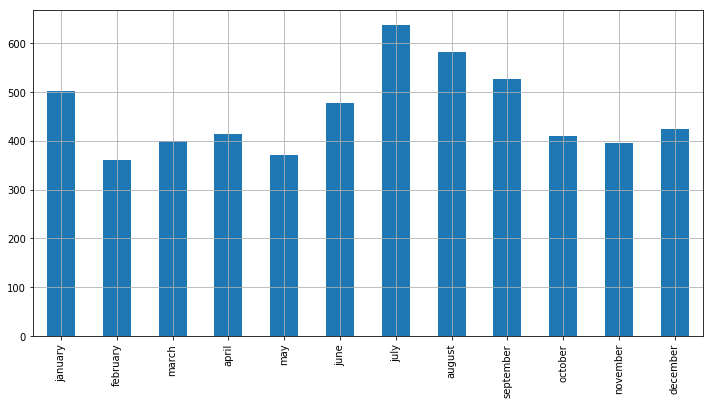

In [160]:
#ploting graphs
shark_attacks.sort_values(by='month')['month'].value_counts(sort=False).plot(kind='bar')
plt.xticks(np.arange(0,12), labels=list(shark_attacks.sort_values(by='month')['month2'].unique())[0:-1])
plt.grid()
plt.show()

Recurrence of deadly attacks per month from 1880 to 2016:

## As we can see, july and august are the most risky months. 
Thats not a coincidence, both months correspond to summer time in north hemisphere
#### Now thats count only the fatal attacks:

In [161]:
#defining a function to counting the number of fatal attacks
def fatal_attacks(x):
    if x == 'N' or x == 'Y':
        return x
    else:
        return np.nan

In [162]:
#creating a new column
shark_attacks['Fatal'] = shark_attacks['Fatal'].apply(fatal_attacks)

In [163]:
#creating a new column
shark_attacks['Fatal'].value_counts()

N    4315
Y    1552
Name: Fatal, dtype: int64

In [164]:
shark_attacks[shark_attacks.Fatal == 'Y'].groupby(['month', 'Fatal']).Fatal.count()

month  Fatal
1.0    Y        145
2.0    Y         95
3.0    Y         98
4.0    Y        111
5.0    Y         90
6.0    Y        116
7.0    Y        143
8.0    Y        126
9.0    Y        126
10.0   Y         77
11.0   Y        100
12.0   Y        138
Name: Fatal, dtype: int64

In [23]:
shark_attacks[shark_attacks.Fatal == 'Y']

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Time,Species,Investigator or Source,pdf,href formula,Case Number.1,Case Number.2,original order,month,month2
8,2016.09.06,06-Sep-16,2016,Unprovoked,NEW CALEDONIA,North Province,Koumac,Kite surfing,David Jewell,M,...,15h40,NaN,"TVANouvelles, 9/6/2016",2016.09.06-Jewell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.06,2016.09.06,5985,9.0,september
52,2016.06.05.a,05-Jun-16,2016,Unprovoked,AUSTRALIA,Western Australia,Mindarie,Diving,Doreen Collyer,F,...,11h30,3+ m shark,"B. Myatt, GSAF",2016.06.05.a-Collyer.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.06.05.a,2016.06.05.a,5941,6.0,june
56,2016.05.31,31-May-16,2016,Unprovoked,AUSTRALIA,Western Australia,"Falcon Beach, Mandurah",Surfing,Ben Gerring,M,...,16h00,White shark,"Perth Now, 5/31/2016",2016.05.31-Gerring.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.05.31,2016.05.31,5937,5.0,may
72,2016.04.09,09-Apr-16,2016,Unprovoked,NEW CALEDONIA,Grand Terre,Poe Beach,Walking,Nicole Malignon,F,...,10h45,"Tiger shark, 2.5 m",Les Nouvelles Caledonnie. 4/11/2016,2016.04.09-Malignon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.04.09,2016.04.09,5921,4.0,april
83,2016.03.10,10-Mar-16,2016,Unprovoked,Fiji,Vanua Levu,NaN,Diving for beche-de-mer,Maika Tabua,M,...,Afternoon,NaN,"Fiji Sun, 3/12/2016",2016.03.10-Tabua.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.03.10,2016.03.10,5910,3.0,march
108,2015.12.19,19-Dec-15,2015,Unprovoked,ARUBA,NaN,Boat capsized,Sea disaster,Adrian Esteban Rafael,M,...,NaN,NaN,"Fox News, 12/11/2015",2015.12.19-Aruba.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.12.19,2015.12.19,5885,12.0,december
125,2015.10.17.c,17-Oct-15,2015,Unprovoked,MOZAMBIQUE,Inhambane Province,"Nahaduga, Inhambane Bay",Fishing for shrimp,Albertina Cavel,F,...,NaN,NaN,Xinhua News Agency,2015.10.17.c-Cavel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.10.17.c,2015.10.17.c,5867,10.0,october
164,2015.07.25,25-Jul-15,2015,Unprovoked,AUSTRALIA,Tasmania,"Lachan Island, Mercury Passage",Scallop diving on hookah,Damien Johnson,M,...,10h00,White shark,"C. Black, GSAF",2015.07.25-Johnson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.07.25,2015.07.25,5828,7.0,july
204,2015.05.09,09-May-15,2015,Unprovoked,NEW CALEDONIA,NaN,Kouare,Snorkeling,Yves Berthelot,M,...,NaN,"Bull shark, 3.5 m",Les Nouvelles Caledonnie,2015.05.09-Berthelot.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.05.09,2015.05.09,5788,5.0,may
208,2015.04.29,29-Apr-15,2015,Unprovoked,USA,Hawaii,Kanahena Cove,Snorkeling,Margaret Cruse,F,...,09h00,NaN,"Star Advertiser, 4/30/2015",2015.04.29-Cruse.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.04.29,2015.04.29,5784,4.0,april


In [165]:
#grouping the fatal cases per month in a dataframe

shark_attacks[shark_attacks.Fatal == 'Y'].groupby(['month', 'Fatal'], as_index=False).Year.count().rename(columns={'Year':'qtd'})

,month,Fatal,qtd
0,1.0,Y,145
1,2.0,Y,95
2,3.0,Y,98
3,4.0,Y,111
4,5.0,Y,90
5,6.0,Y,116
6,7.0,Y,143
7,8.0,Y,126
8,9.0,Y,126
9,10.0,Y,77


In [166]:
shark_attacks[shark_attacks.Fatal == 'Y'].groupby(['month', 'Fatal'], group_keys=False).Year.count().rename(columns={'Year':'qtd'})

month  Fatal
1.0    Y        145
2.0    Y         95
3.0    Y         98
4.0    Y        111
5.0    Y         90
6.0    Y        116
7.0    Y        143
8.0    Y        126
9.0    Y        126
10.0   Y         77
11.0   Y        100
12.0   Y        138
dtype: int64

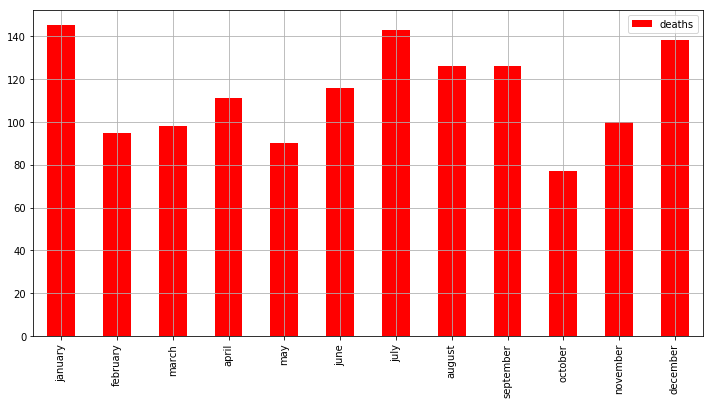

In [167]:
#plotting the fatal cases

shark_attacks[shark_attacks.Fatal == 'Y'] \
        .groupby(['month', 'Fatal'], 
                 as_index=False, 
                 group_keys=False)\
            .Year.count()\
                .rename(columns={'Year':'deaths'})\
                    .drop(['Fatal','month'], axis=1)\
                        .plot(kind='bar', color='red')

plt.xticks(np.arange(0,12), labels=list(shark_attacks.sort_values(by='month')['month2'].unique())[0:-1])
plt.grid()
plt.show()

As we can see, although the mayor cases of shark attacks are during the summer time in north hemisphere, most of fatal cases are concentrated in january and december, the summertime in south. July is still a bad month to get into sea.